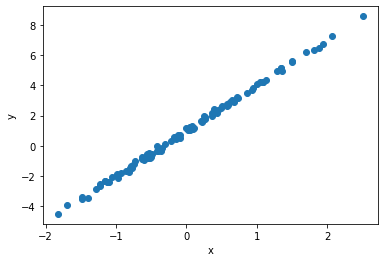

4/4 [==============================] - 0s 3ms/step
R^2 Score: 0.9984


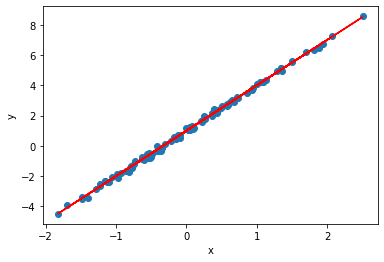

R^2 Score: 0.9984


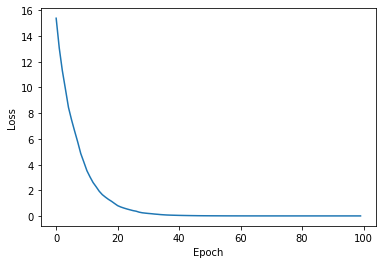

Model saved to linear_regression_model.h5
Info of the original model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Model parameters:
dense: True
Info of the loaded model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Model parameters:
dense: True
Comparing the 

False

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

def create_dataset(num_samples, num_features):
    x = np.random.randn(num_samples, num_features)
    y = 3 * x + 1 + np.random.randn(num_samples, num_features) * 0.1
    return x, y

def plot_data(x, y, y_pred=None):
    plt.scatter(x, y)
    if y_pred is not None:
        plt.plot(x, y_pred, color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def create_linear_regression_model(num_features):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(1, input_shape=(num_features,)))
    return model

def compile_model(model, learning_rate):
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    loss_fn = tf.keras.losses.MeanSquaredError()
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['mse'])

def train_model(model, x_train, y_train, num_epochs):
    return model.fit(x_train, y_train, epochs=num_epochs, verbose=0)

def evaluate_model(model, x_train, y_train):
    mse_value = model.evaluate(x_train, y_train, verbose=0)[0]
    y_pred = model.predict(x_train)
    r2_score = 1 - mse_value / np.var(y_train)
    return y_pred, r2_score

def plot_loss(history, num_epochs):
    plt.plot(range(num_epochs), history.history['loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

def save_trained_model(model, model_path):
    model.save(model_path)
    print(f"Model saved to {model_path}")

def load_saved_model(model_path):
    return load_model(model_path)

def print_model_info(model):
    print(model.summary())
    print('Model parameters:')
    for layer in model.layers:
        print(f'{layer.name}: {layer.trainable}')

def compare_models(model1, model2):
    if model1.count_params() != model2.count_params():
        print("The two models have different numbers of parameters.")
        return False
    
    for p1, p2 in zip(model1.get_weights(), model2.get_weights()):
        if np.array_equal(p1, p2):
            print("The two models have different parameters.")
            return False
    
    print("The two models have the same parameters.")
    return True

# 1. Create a supervised linear regression dataset
num_samples = 100
num_features = 1
x_train, y_train = create_dataset(num_samples, num_features)

# 2. Plot the relationship
plot_data(x_train, y_train)

# 3. Create the linear regression model
model = create_linear_regression_model(num_features)

# 4. Compile the model
learning_rate = 0.01
compile_model(model, learning_rate)

# 5. Train the model
num_epochs = 100
history = train_model(model, x_train, y_train, num_epochs)

# 6. Evaluate the model
y_pred, r2_score = evaluate_model(model, x_train, y_train)
print(f"R^2 Score: {r2_score:.4f}")

# 7. Visualize the dataset and the prediction line
plot_data(x_train, y_train, y_pred)

# 8. Calculate the R^2 score
print(f"R^2 Score: {r2_score:.4f}")

# 9. Plot the loss over epochs
plot_loss(history, num_epochs)

# 10. Save the trained model
model_path = 'linear_regression_model.h5'
save_trained_model(model, model_path)

# 11. Load the saved model
loaded_model = load_saved_model(model_path)

# 12. Print the info of the original model
print("Info of the original model:")
print_model_info(model)

print("================================================\n================================================\n================================================")
# 13. Print the info of the loaded model
print("Info of the loaded model:")
print_model_info(loaded_model)

print("================================================\n================================================\n================================================")
# 14. Compare the original model with the loaded model
print("Comparing the original model with the loaded model:")
compare_models(model, loaded_model)